In [3]:
import random
import math
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.lines import Line2D

In [9]:
def constant_i(starting_time,amper,finish_time,time_delta):
    length = int(finish_time / time_delta)
    i_data = []
    for i in range(length):
        if i*time_delta >= starting_time:
            i_data.append(amper)
        else:
            i_data.append(0)
    return i_data

def fichart(max_i,resistance,capacity,delta):
    fii = []
    for i in range (max_i):
        fii.append(spike(0,i,resistance,capacity,delta,False))
    return fii

def spike(starting_time,amper,resistance,capacity,delta,flag=True):
    tau = resistance * capacity

    time = 0
    time_delta = 0.05

    u_rest = -70
    threshold = -55
    theta = -60
#     delta = 1

    u_data = []

    finish_time = 1500

    i_data = constant_i(starting_time,amper,finish_time,time_delta)
    i_index = 0
    
    tt = 0
    u_t = u_rest
    
    f = 0
    
    spike_times = [starting_time]

    while (tt + time_delta < finish_time) :

        i_t = i_data[i_index]

        u_t_plus_theta = -time_delta * (u_t - u_rest) / tau + ((time_delta * delta)/tau) * math.exp ((u_t - theta)/delta) + (resistance * time_delta)/tau * i_t + u_t
        
        time += time_delta
        if u_t_plus_theta >= threshold:
            spike_times.append(tt)
            time = starting_time
            u_t_plus_theta = u_rest
            
        if len(spike_times) == 2:
            T = abs(spike_times[1] - spike_times[0])
            f = 1/T
        
        u_data.append(u_t_plus_theta)
        u_t = u_data[-1]
        
        i_index += 1
        tt += time_delta
        
    if flag==True:
        point1 = [0,threshold]
        point2 = [finish_time,threshold]
        x_values1 = [point1[0], point2[0]]
        y_values1 = [point1[1], point2[1]]

        point3 = [0,theta]
        point4 = [finish_time,theta]
        x_values2 = [point3[0], point4[0]]
        y_values2 = [point3[1], point4[1]]

        point5 = [0,u_rest]
        point6 = [finish_time,u_rest]
        x_values3 = [point5[0], point6[0]]
        y_values3 = [point5[1], point6[1]]

        fig = plt.figure(constrained_layout=True)
        gs = fig.add_gridspec(5, 5)
        axs0 = fig.add_subplot(gs[:3, :])
        axs1 = fig.add_subplot(gs[3, :])
        fig.set_figwidth(10)
        fig.set_figheight(8)
        axs0.plot([int(i*time_delta) for i in np.arange(len(u_data))],u_data)
        axs0.plot(x_values1,y_values1,'r--',label='Threshold')
        axs0.plot(x_values2,y_values2,'g--',label='Theta')
        axs0.plot(x_values3,y_values3,'k--',label='U_Rest')
        axs0.set_ylim(-75,-50)
        axs0.set_ylabel('U')
        leg1 = axs0.legend()
        custom_lines = [Line2D([0], [0],color='w', lw=1),
            Line2D([0], [0],color='w', lw=1),
            Line2D([0], [0],color='w', lw=1),
            Line2D([0], [0],color='w', lw=1)]
        a = 'I = ' + str(amper)
        b = 'R = ' + str(resistance)
        c = 'C = ' + str(capacity)
        d = 'Delta = ' + str(delta)
        axs0.legend(custom_lines,[a,b,c,d],loc='upper left')
        axs0.add_artist(leg1)
        axs0.set_yticks(np.arange(-75,-50,5))
        axs1.plot([int(i*time_delta) for i in np.arange(len(i_data))],i_data)
        axs1.set_ylim(min(i_data)-1,max(i_data)+1)
        axs1.set_ylabel('I')
        axs1.set_xlabel('Time')
        fii = fichart(amper * 2,resistance,capacity,delta)
        axs2 = fig.add_subplot(gs[4:,:])
        axs2.plot(np.arange(len(fii)),fii)
        axs2.set_ylabel('F')
        axs2.set_xlabel('I')
        
    if flag == False:
        return f
    
    return fii

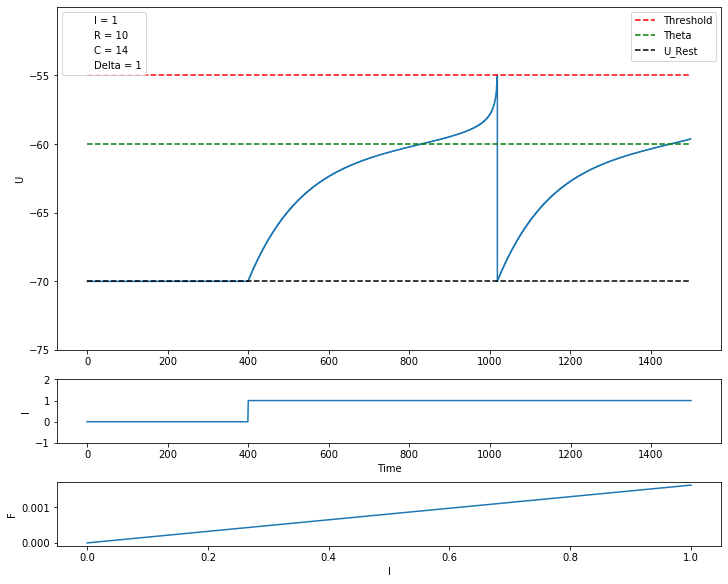

In [10]:
fii = spike(starting_time = 400,amper = 1,resistance = 10,capacity = 14,delta = 1,flag=True)

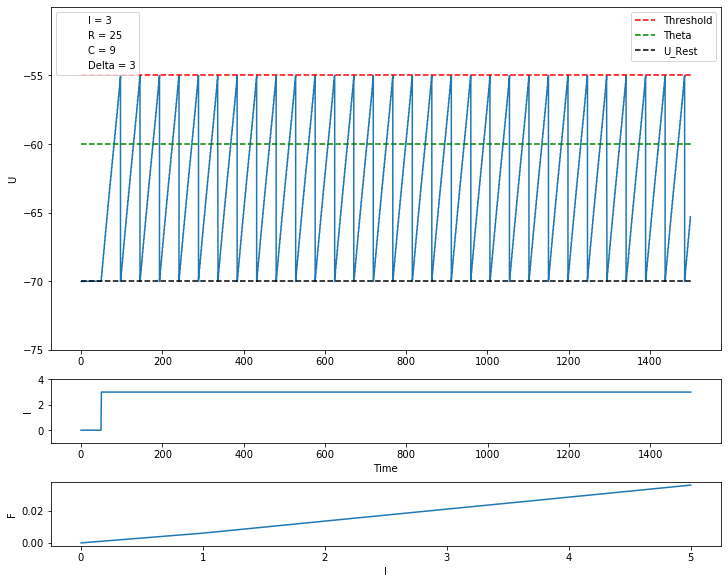

In [11]:
fii = spike(starting_time = 50,amper = 3,resistance = 25,capacity = 9,delta = 3,flag=True)

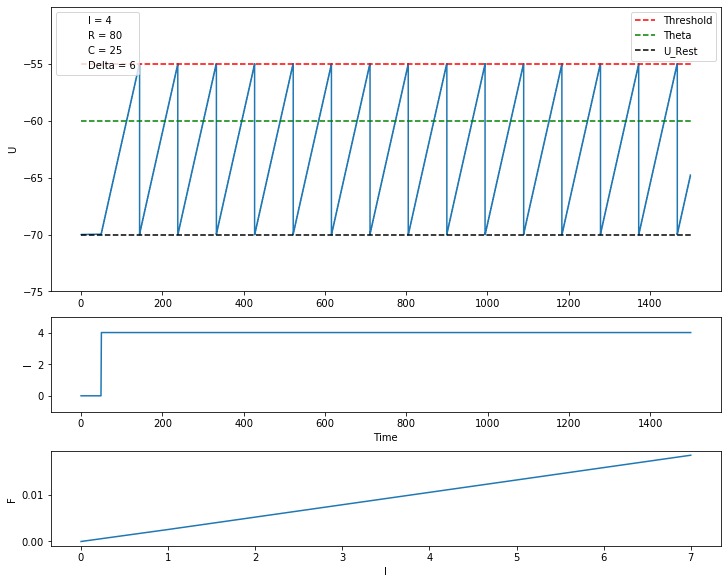

In [12]:
fii = spike(starting_time = 50,amper = 4,resistance = 80,capacity = 25,delta = 6,flag=True)

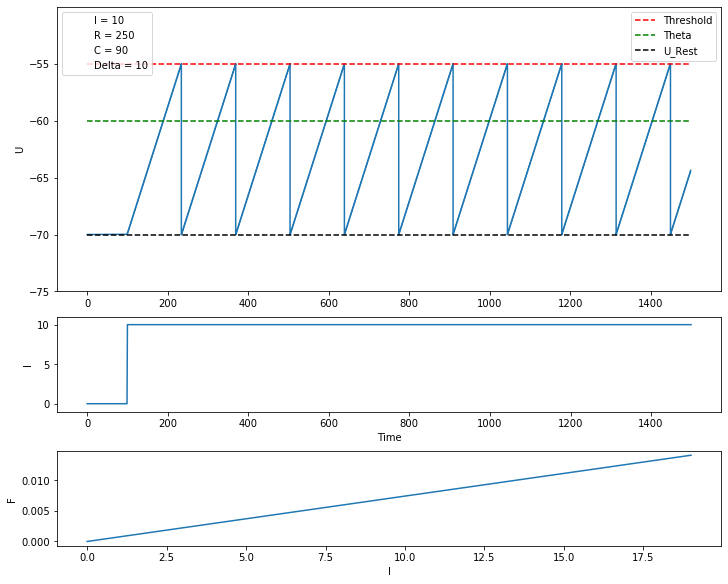

In [13]:
fii = spike(starting_time = 100,amper = 10,resistance = 250,capacity = 90,delta = 10,flag=True)

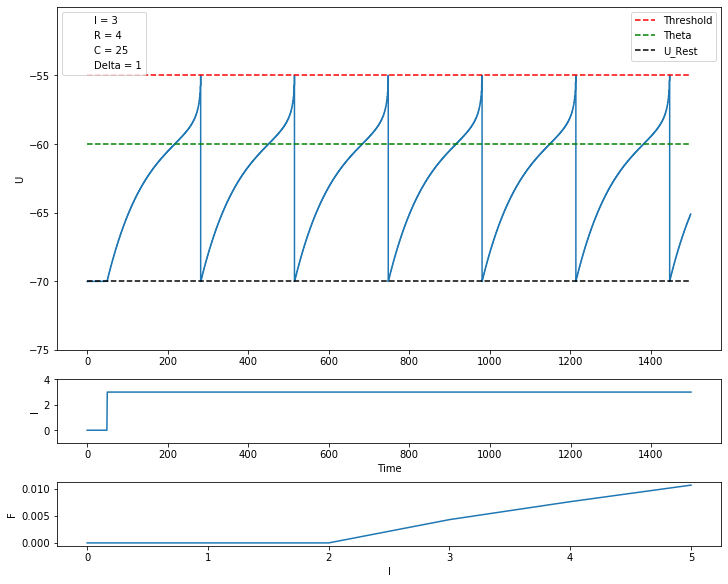

In [14]:
fii = spike(starting_time = 50,amper = 3,resistance = 4,capacity = 25,delta = 1,flag=True)